In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_0084_travel_time.csv')
route_list_SSID42844285 = []
for r in route_list_SSID42844285:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Monday,4132,0,840001,0.0,41704132,False,4170,2012-11-05,59,6010,9.0
1,Monday,4134,0,840001,0.0,41324134,False,4132,2012-11-05,61,6010,9.0
2,Monday,4135,0,840001,0.0,41344135,False,4134,2012-11-05,43,6010,9.0
3,Monday,4136,0,840001,0.0,41354136,False,4135,2012-11-05,36,6010,9.0
4,Monday,4207,0,840001,0.0,41364207,False,4136,2012-11-05,61,6010,9.0
5,Monday,4208,0,840001,0.0,42074208,False,4207,2012-11-05,38,6010,9.0
6,Monday,4210,0,840001,0.0,42084210,False,4208,2012-11-05,102,6010,9.0
7,Monday,4211,0,840001,0.0,42104211,False,4210,2012-11-05,30,6010,9.0
8,Monday,5139,0,840001,0.0,42115139,False,4211,2012-11-05,51,6010,9.0
9,Monday,4214,0,840001,0.0,51394214,False,5139,2012-11-05,38,6010,9.0


time: 4.41 s


Description:  

In [3]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	171
HourFrame	19
JourneyPatternID	6
Rain	72
SSID	1020
SchoolHoliday	2
SourceStopID	171
TimeFrame	57
TravelTime	923
VehicleJourneyID	371
WindSpeed	58
time: 22 ms


In [4]:
# create dataframe for SSID 42844285

res['SSID'] = res['SSID'].astype('category')
leeson = res[res.SSID == 42844285]
leeson.shape

(900, 12)

time: 10 ms


In [5]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in leeson:
    print(column + "\t" + str(len(leeson[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	18
JourneyPatternID	3
Rain	61
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	56
TravelTime	65
VehicleJourneyID	178
WindSpeed	56
time: 6 ms


In [6]:
# drop unneeded columns

leeson = leeson.drop(['SourceStopID', 'DestStopID'], axis=1)

time: 2 ms


In [7]:
# reorder columns

leeson = leeson[['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'TimeFrame', 'JourneyPatternID', 'VehicleJourneyID', 'SSID']]

time: 2 ms


In [8]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 
leeson.SSID = leeson.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 27 ms


In [9]:
leeson.reset_index(inplace=True)
leeson = leeson.drop('index', axis=1)
leeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
0,59,8,Tuesday,False,0.000000,15.0,2012-11-06,841001,5969,42844285
1,61,14,Tuesday,False,0.000000,17.0,2012-11-06,841001,5973,42844285
2,62,17,Tuesday,False,0.000000,14.0,2012-11-06,841001,5975,42844285
3,43,20,Tuesday,False,0.000000,15.0,2012-11-06,841001,5977,42844285
4,39,21,Tuesday,False,0.000000,14.0,2012-11-06,841001,5993,42844285
5,78,10,Tuesday,False,0.000000,16.5,2012-11-06,841001,6001,42844285
6,72,16,Tuesday,False,0.000000,15.5,2012-11-06,841001,6005,42844285
7,61,19,Tuesday,False,0.000000,16.0,2012-11-06,841001,6007,42844285
8,43,22,Tuesday,False,0.000000,16.0,2012-11-06,841001,6009,42844285
9,39,7,Tuesday,False,0.033333,14.5,2012-11-06,841001,6011,42844285


time: 32 ms


In [10]:
# save as csv

r = leeson.loc[0, 'SSID'] 
leeson.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 27 ms


In [11]:
# load csv

leeson = pd.read_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 4 ms


In [12]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 

leeson.SSID = leeson.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 2 ms


In [13]:
leeson.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
Unnamed: 0          900 non-null int64
TravelTime          900 non-null int64
HourFrame           900 non-null int64
Day                 900 non-null object
SchoolHoliday       900 non-null bool
Rain                900 non-null float64
WindSpeed           900 non-null float64
TimeFrame           900 non-null object
JourneyPatternID    900 non-null int64
VehicleJourneyID    900 non-null int64
SSID                900 non-null object
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 222.7 KB
time: 7 ms


In [14]:
leeson = leeson.drop('Unnamed: 0', axis=1)

time: 2 ms


In [15]:
# assign more appropriate datatypes
leeson['Day'] = leeson['Day'].astype('category')
leeson['JourneyPatternID'] = leeson['JourneyPatternID'].astype('category')
leeson['VehicleJourneyID'] = leeson['VehicleJourneyID'].astype('category')
leeson['SSID'] = leeson['SSID'].astype('category')
leeson['HourFrame'] = leeson['HourFrame'].astype('category')
leeson['TimeFrame'] = pd.to_datetime(leeson['TimeFrame'], format='%Y-%m-%d')

time: 8 ms


In [16]:
# necessary for later operation

leeson.JourneyPatternID.cat.remove_unused_categories(inplace=True)

time: 1e+03 µs


In [17]:
leeson.memory_usage(deep=True)

Index                 80
TravelTime          7200
HourFrame           1684
Day                 1669
SchoolHoliday        900
Rain                7200
WindSpeed           7200
TimeFrame           7200
JourneyPatternID     924
VehicleJourneyID    8344
SSID                1045
dtype: int64

time: 4 ms


## Analysis of target feature TravelTime

In [18]:
# Checking stats for TravelTime so as to better understand the following graphs

leeson.TravelTime.describe()

count    900.000000
mean      58.716667
std       20.471385
min       16.000000
25%       41.000000
50%       59.000000
75%       62.000000
max      201.000000
Name: TravelTime, dtype: float64

time: 6 ms


Histiogram of values (x-axis is number of seconds)

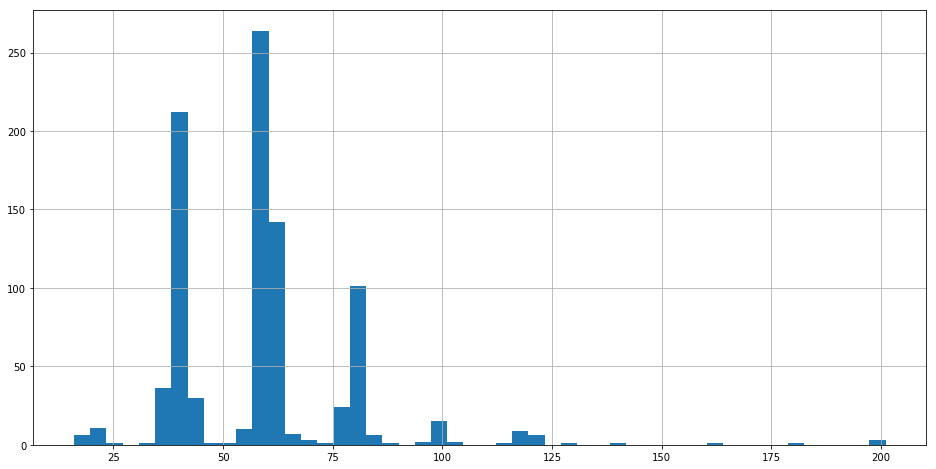

time: 219 ms


In [19]:
leeson.TravelTime.hist(figsize=(16, 8), bins=50)

Observation:  Times appear in blocks, presumably due to the method of counting (every 20 seconds or so)

Boxplot to check for outliers

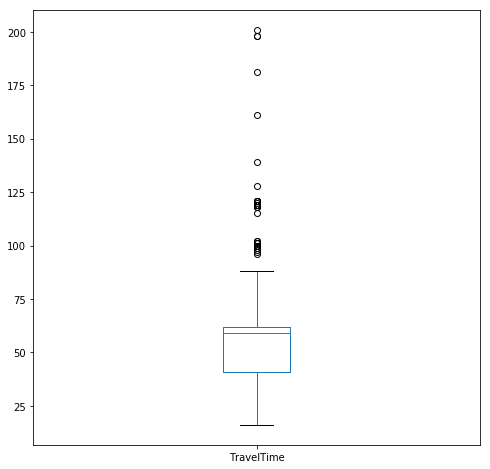

time: 113 ms


In [20]:
leeson.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [21]:
# checking how isolated top high-value outliers are in terms of time/date, and density of low-value outliers 

leeson.sort_values(['TravelTime', 'TimeFrame'], ascending=False, inplace=True)
leeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
27,201,12,Thursday,False,0.000000,11.0,2012-11-08,841001,5987,42844285
676,198,15,Saturday,True,0.000000,3.5,2012-11-24,841002,11662,42844285
122,198,22,Friday,False,0.000000,6.5,2012-11-16,841001,6009,42844285
151,181,14,Tuesday,False,0.000000,18.0,2012-11-20,841001,5296,42844285
38,161,21,Friday,False,0.000000,9.5,2012-11-09,841001,5993,42844285
489,139,20,Monday,False,0.000000,4.5,2013-01-21,841001,5082,42844285
260,128,17,Friday,False,0.000000,4.0,2012-11-30,841001,5337,42844285
581,121,20,Tuesday,False,0.000000,18.0,2013-01-29,841001,5082,42844285
586,121,16,Tuesday,False,2.300000,28.0,2013-01-29,841001,5110,42844285
375,121,21,Thursday,False,0.000000,11.0,2013-01-10,841001,5176,42844285


time: 36 ms


Observation:  Even on this remote segment, the outliers are generally not really grouped by time/date but seem rather random (though there are a number of entries for around evening rush hour on 29th January).

## Looking at dropping outliers

In [90]:
find_lb = pd.read_csv('use_speed_and_distance_get_outlier_bound.csv')
lb = find_lb.loc[find_lb['SSID'] == 42844285, 'min_sec'].iloc[0]
print(lb)

15.8705121339
time: 3 ms


In [92]:
# make a copy of original df
trimleeson = leeson.copy()

# Remove TravelTime upper bound outliers beyond a conservative 3 x IQR, and lowerbound below 'lb'
ub = trimleeson.quantile(q=.75) + (3*(trimleeson.quantile(q=.75)-trimleeson.quantile(q=.25)))
trimleeson['OutlierTT'] = (trimleeson['TravelTime'] < lb) | (trimleeson['TravelTime'] > ub['TravelTime'])

# Outlier rows counted
print("There would be", trimleeson[(trimleeson['OutlierTT'] == True)].shape[0], "outliers dropped.")

There would be 7 outliers dropped.
time: 16 ms


In [37]:
trimleeson = trimleeson[trimleeson.OutlierTT != True]
trimleeson.sort_values(['TravelTime'], ascending=False, inplace=True)

time: 44 ms


In [38]:
trimleeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID,OutlierTT
581,121,20,Tuesday,False,0.000000,18.0,2013-01-29,841001,5082,42844285,False
375,121,21,Thursday,False,0.000000,11.0,2013-01-10,841001,5176,42844285,False
233,121,20,Wednesday,False,0.000000,6.5,2012-11-28,841001,5339,42844285,False
156,121,21,Tuesday,False,0.000000,15.0,2012-11-20,841001,5316,42844285,False
586,121,16,Tuesday,False,2.300000,28.0,2013-01-29,841001,5110,42844285,False
512,120,16,Tuesday,False,0.000000,3.0,2013-01-22,841001,5126,42844285,False
580,119,17,Tuesday,False,0.566667,21.5,2013-01-29,841001,5080,42844285,False
589,119,17,Tuesday,False,0.566667,21.5,2013-01-29,841001,5126,42844285,False
441,119,10,Wednesday,False,0.000000,6.5,2013-01-16,841001,5184,42844285,False
431,119,19,Tuesday,False,0.000000,4.0,2013-01-15,841001,5190,42844285,False


time: 37 ms


## Weather features

(array([ 0.5,  1.5,  2.5]), <a list of 3 Text xticklabel objects>)

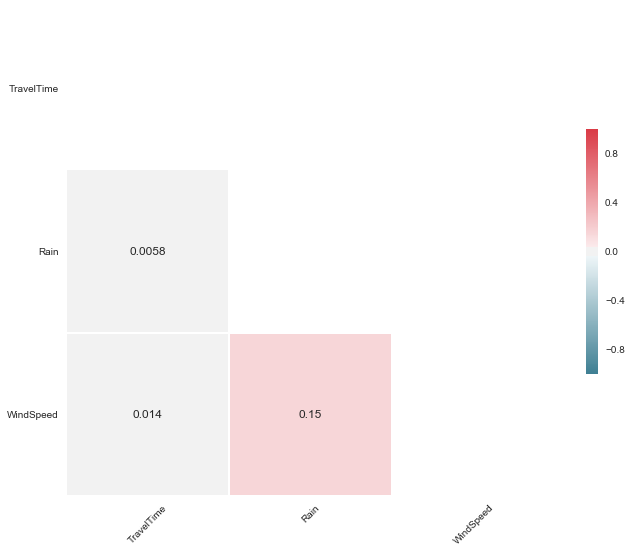

time: 187 ms


In [22]:
# checking correlations between weather and TravelTime

cont_columns = leeson[['TravelTime', 'Rain', 'WindSpeed']].columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = leeson[cont_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

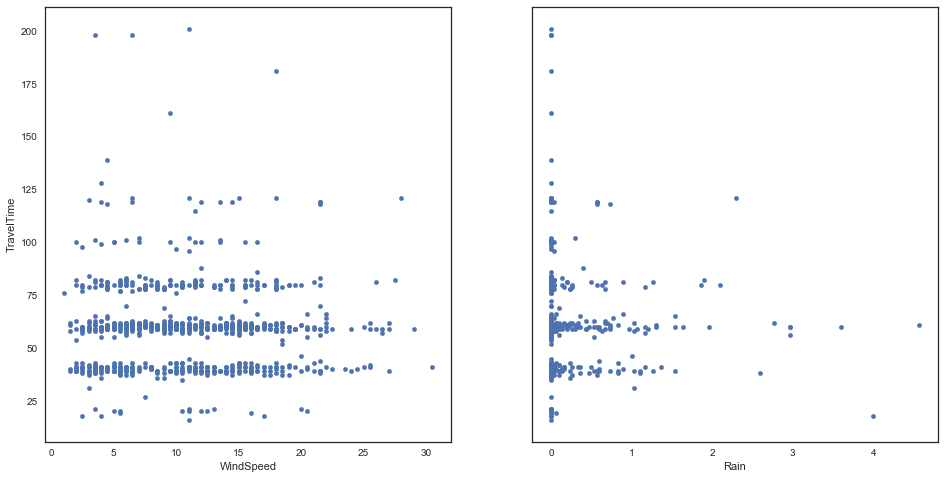

time: 268 ms


In [23]:
# scatterplots for the relationship between weather and TravelTime
fig, axs = plt.subplots(1, 2, sharey=True)
leeson.plot(kind='scatter', x='WindSpeed', y='TravelTime', ax=axs[0], figsize=(16, 8))
leeson.plot(kind='scatter', x='Rain', y='TravelTime', ax=axs[1])

Observation:  

## TravelTime and categorical features

In [24]:
# Create variables for horizontal lines in the charts below to represent the mean/medium.

leeson_mean = leeson.TravelTime.mean()
leeson_median  = leeson.TravelTime.median()

time: 3 ms


## JourneyPatternID strip plot

#### Note: In below charts, horizontal line is overall mean/median

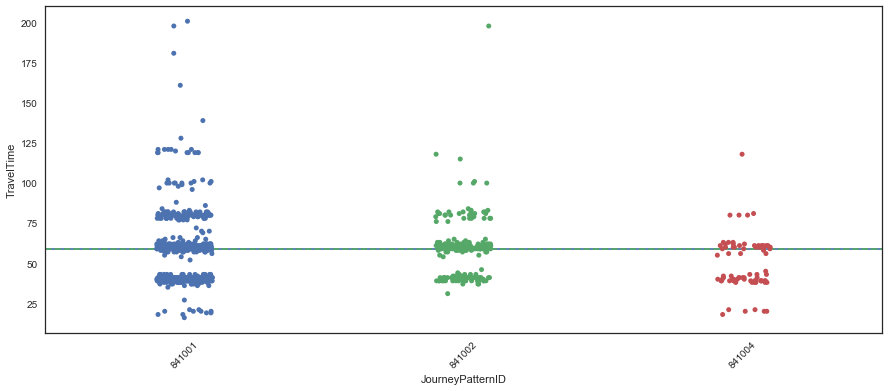

time: 182 ms


In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=45)
sns.stripplot(x='JourneyPatternID', y="TravelTime", data=leeson, jitter=True);

coord_x1 = -1
coord_y1 = leeson_mean
coord_z1 = leeson_median
coord_x2 = 30


# mean full line, median dashed line
plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')
plt.plot([coord_x1, coord_x2], [coord_z1, coord_z1], '--')

Observation:  As in the bar chart for TimeTaken, the recorded times are in blocks due to the method of data collection (sent back roughly every 20 seconds usually). 

### Bar plot for mean TravelTime per JourneyPatternID

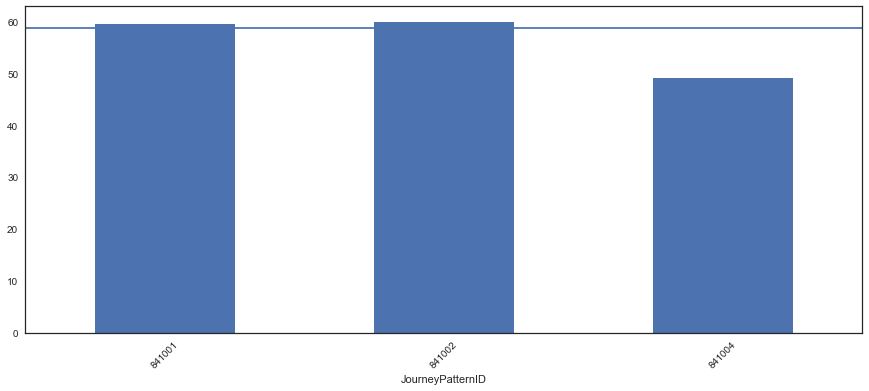

time: 157 ms


In [26]:
mean_JPID = leeson.groupby('JourneyPatternID')['TravelTime'].mean()
mean_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

# code for line from https://stackoverflow.com/questions/38017465/how-to-add-a-line-on-top-of-a-bar-chart

coord_x1 = -1
coord_y1 = leeson_mean
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per JourneyPatternID

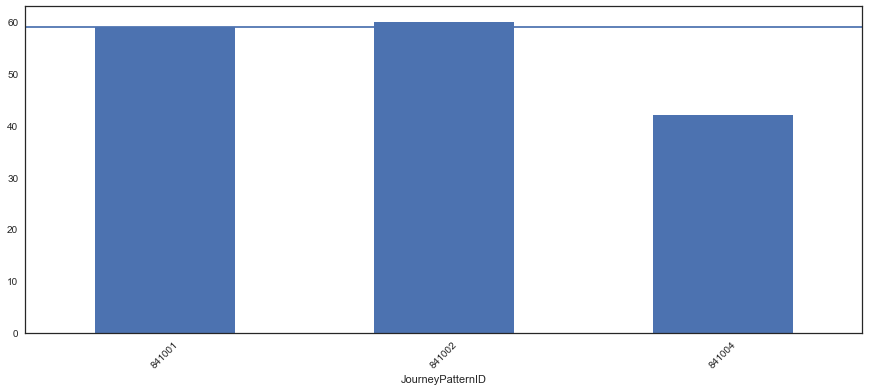

time: 125 ms


In [27]:
median_JPID = leeson.groupby('JourneyPatternID')['TravelTime'].median()
median_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

coord_x1 = -1
coord_y1 = leeson_median
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  JPID00841004 is significantly faster it seems.

Let's see how many there are of each.

In [28]:
leeson['JourneyPatternID'].value_counts()

841001    601
841002    220
841004     79
Name: JourneyPatternID, dtype: int64

time: 6 ms


But there are very few instances of JPID00841004.

### Bar plot for mean TravelTime per HourFrame

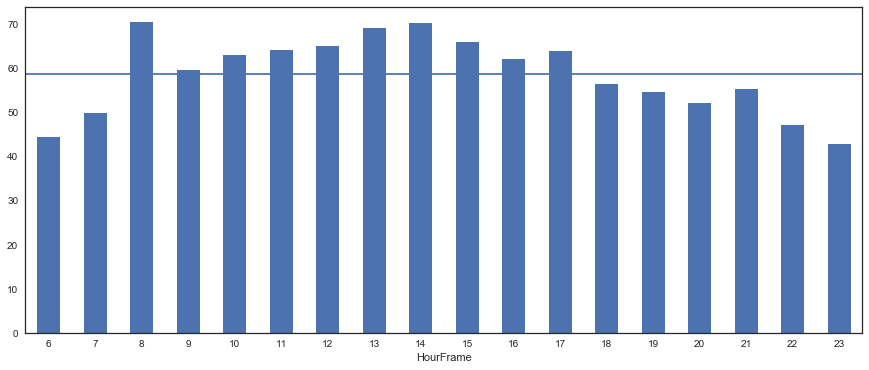

time: 175 ms


In [29]:
mean_HF = leeson.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

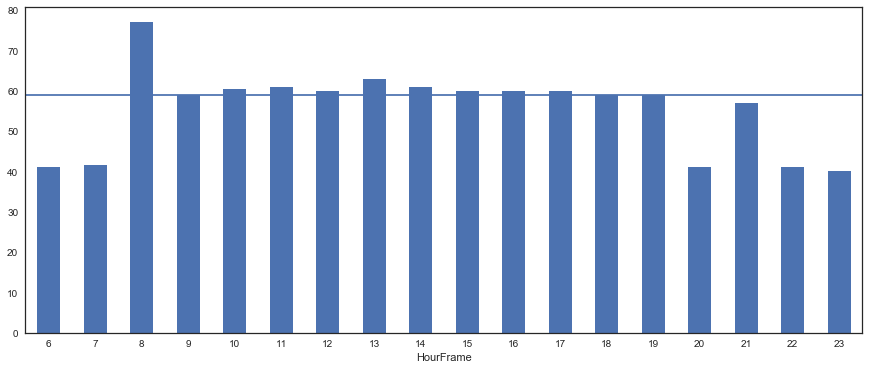

time: 176 ms


In [30]:
med_HF = leeson.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Quiet early morning and after 7pm (with an anomalous-looking result at 9pm), busier in the morning rush hour, not much variation during the rest of the day.  

### Bar plot for mean TravelTime per Day

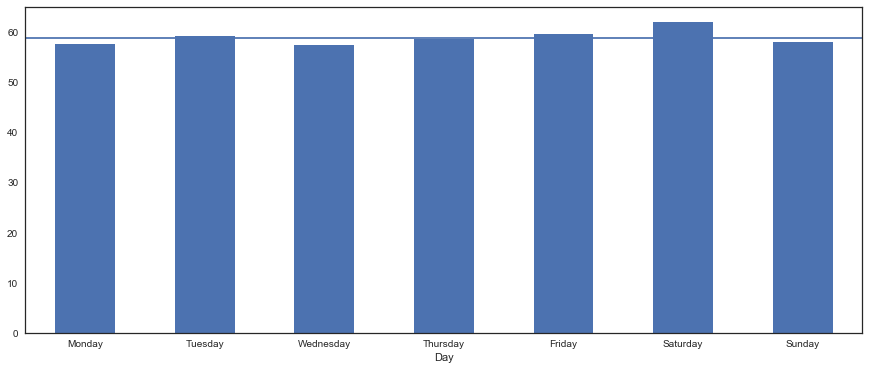

time: 139 ms


In [31]:
mean_Day = leeson.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

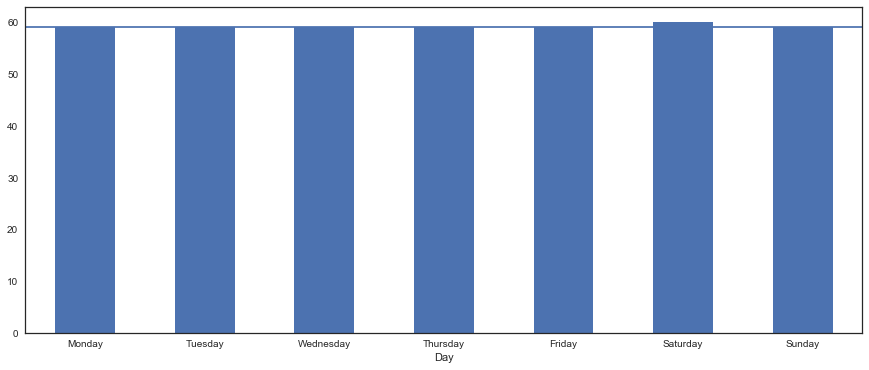

time: 141 ms


In [32]:
med_Day = leeson.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Saturday is slightly ahead of average but all else is much the same.

### Bar plot for mean TravelTime when SchoolHoliday true/false

In [33]:
# check how many rows are true/false for SchoolHoliday
leeson.SchoolHoliday.describe().T

count       900
unique        2
top       False
freq        682
Name: SchoolHoliday, dtype: object

time: 6 ms


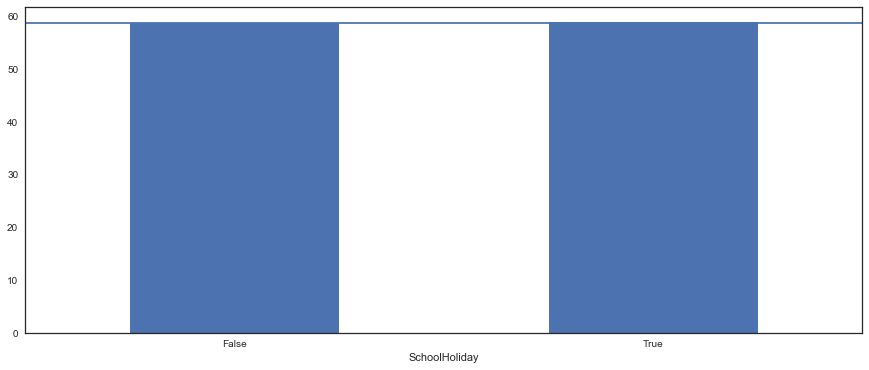

time: 119 ms


In [34]:
mean_SH = leeson.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:

### Bar plot for median TravelTime when SchoolHoliday true/false

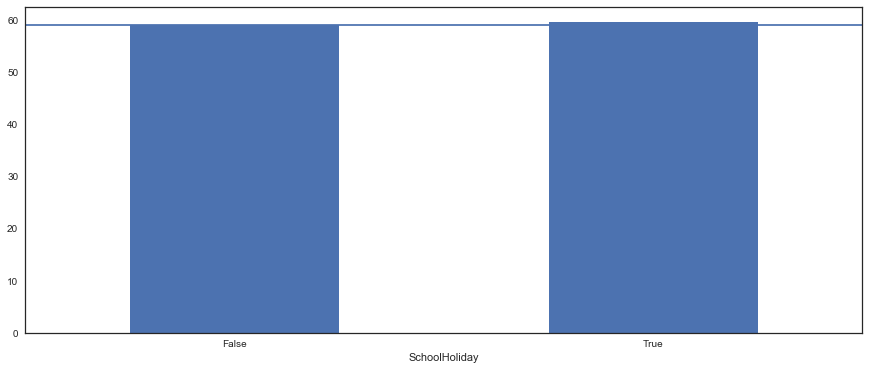

time: 163 ms


In [35]:
med_SH = leeson.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  No real difference here

NOTE - Outliers not removed.

Observation:  

### Linear Regression model

In [39]:
# Train/fit a model using all features to start with.
# Some modifications to the data first

# dropping SSID and TimeFrame as these have no predictive value here
LRleeson = leeson.drop(['SSID', 'TimeFrame'], axis=1)

# Convert binary categorical SchoolHoliday column to numerical.
LRleeson['SchoolHoliday'] = LRleeson['SchoolHoliday'].astype('int')

time: 4 ms


In [40]:
# preliminary training to see which variables are worth selecting
# delete Xbuses from formula if none
lrle = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + C(JourneyPatternID)+ C(HourFrame) + C(Day)", data=LRleeson).fit()

time: 24 ms


In [41]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.715
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           8.73e-23
Time:                        20:30:59   Log-Likelihood:                -3905.7
No. Observations:                 900   AIC:                             7869.
Df Residuals:                     871   BIC:                             8009.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Observation:  Still not great results, even with only one route running here.  Note that weather has no predictive value - not really surprising given this segment is in Wicklow and the weather stations are all North to West of Dublin.  Days and school holidays have no predictive value either, as expected from viewing the charts.  We will drop all these and just look at JPIDs and hours.

In [42]:
rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle) 

print ("Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.")
print ("The R-squared value of", rsqa, "means that Linear Regression is unlikely to be useful in the long run though.")
#ols(y=rets['AAPL'], x=rets.ix[:, ['GOOG']]).rsquared

Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.
The R-squared value of 0.151091841184 means that Linear Regression is unlikely to be useful in the long run though.
time: 2 ms


In [43]:
# Train/fit a model using features with p-value under 0.05

# create dummy variables from HourFrame, Day, JourneyPatternID using get_dummies
# code adapted from: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
HF_dummies = pd.get_dummies(LRleeson.HourFrame, prefix='HF')
Day_dummies = pd.get_dummies(LRleeson.Day, prefix='Day')
JPID_dummies = pd.get_dummies(LRleeson.JourneyPatternID, prefix='JPID')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
LRleeson = pd.concat([LRleeson, HF_dummies, Day_dummies, JPID_dummies], axis=1)

time: 7 ms


In [44]:
print(LRleeson.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_841001', 'JPID_841002', 'JPID_841004']
time: 1 ms


In [45]:
# remove any features with p-values under 0.05 

#LRleeson = LRleeson.drop(['delete', 'any', 'features', 'you', 'wish'], axis = 1)


time: 3 ms


In [46]:
LRleeson.head(25)

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,JourneyPatternID,VehicleJourneyID,HF_6,HF_7,...,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,JPID_841001,JPID_841002,JPID_841004
27,201,12,Thursday,0,0.000000,11.0,841001,5987,0,0,...,0,0,0,0,1,0,0,1,0,0
676,198,15,Saturday,1,0.000000,3.5,841002,11662,0,0,...,0,0,1,0,0,0,0,0,1,0
122,198,22,Friday,0,0.000000,6.5,841001,6009,0,0,...,1,0,0,0,0,0,0,1,0,0
151,181,14,Tuesday,0,0.000000,18.0,841001,5296,0,0,...,0,0,0,0,0,1,0,1,0,0
38,161,21,Friday,0,0.000000,9.5,841001,5993,0,0,...,1,0,0,0,0,0,0,1,0,0
489,139,20,Monday,0,0.000000,4.5,841001,5082,0,0,...,0,1,0,0,0,0,0,1,0,0
260,128,17,Friday,0,0.000000,4.0,841001,5337,0,0,...,1,0,0,0,0,0,0,1,0,0
581,121,20,Tuesday,0,0.000000,18.0,841001,5082,0,0,...,0,0,0,0,0,1,0,1,0,0
586,121,16,Tuesday,0,2.300000,28.0,841001,5110,0,0,...,0,0,0,0,0,1,0,1,0,0
375,121,21,Thursday,0,0.000000,11.0,841001,5176,0,0,...,0,0,0,0,1,0,0,1,0,0


time: 30 ms


In [47]:
lrle1 = sm.ols(formula="TravelTime ~ JPID_841001 + JPID_841002 + JPID_841004 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23", data=LRleeson).fit()

time: 21 ms


In [48]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     9.647
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           6.75e-26
Time:                        20:30:59   Log-Likelihood:                -3908.5
No. Observations:                 900   AIC:                             7857.
Df Residuals:                     880   BIC:                             7953.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      39.9544      0.924     43.241      

Observation:  Adjusted r-squared value actually goes up after dropping days, school holidays and weather.  Several hour values closest to the median lack predictive value, which is to be expected.

Running model with outliers cut (3 x IQR)

In [49]:
trimleeson['JourneyPatternID'].value_counts()

841001    595
841002    219
841004     79
Name: JourneyPatternID, dtype: int64

time: 5 ms


In [50]:
HF_dummies = pd.get_dummies(trimleeson.HourFrame, prefix='HF')
Day_dummies = pd.get_dummies(trimleeson.Day, prefix='Day')
JPID_dummies = pd.get_dummies(trimleeson.JourneyPatternID, prefix='JPID')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
trimleeson = pd.concat([trimleeson, HF_dummies, Day_dummies, JPID_dummies], axis=1)

time: 6 ms


In [51]:
lrle2 = sm.ols(formula="TravelTime ~ JPID_841001 + JPID_841002 + JPID_841004 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23", data=trimleeson).fit()

time: 26 ms


In [52]:
print(lrle2.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     13.58
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           7.61e-38
Time:                        20:30:59   Log-Likelihood:                -3718.5
No. Observations:                 893   AIC:                             7477.
Df Residuals:                     873   BIC:                             7573.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      39.4976      0.775     50.932      

Somewhat significantly better results, as expected.

Running model with outliers cut (1.5 x IQR)

In [53]:
trimleeson1 = LRleeson.copy()

trimleeson1['SchoolHoliday'] = trimleeson1['SchoolHoliday'].astype('int')

# Remove TravelTime outliers beyond a conservative 3 x IQR
# Code adapted from here: http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/07%20-%20Lesson.ipynb
# Also got some help here: https://www.reddit.com/r/learnpython/comments/65sz8g/trying_to_get_highlight_outliers_in_a_dataframe/
# Functions first defined for calculating upper and lower bounds.
lowerOp = trimleeson1.quantile(q=.25) - (1.5*(trimleeson1.quantile(q=.75)-trimleeson1.quantile(q=.25)))
upperOp = trimleeson1.quantile(q=.75) + (1.5*(trimleeson1.quantile(q=.75)-trimleeson1.quantile(q=.25)))

# New boolean column created where values beyond the bounds for 'TravelTime' are tagged as True.
trimleeson1['OutlierTT'] = (trimleeson1['TravelTime'] < lowerOp['TravelTime']) | (trimleeson1['TravelTime'] > upperOp['TravelTime'])

# Outlier rows counted
print("There would be", trimleeson1[(trimleeson1['OutlierTT'] == True)].shape[0], "outliers dropped.")

There would be 42 outliers dropped.
time: 20 ms


In [54]:
trimleeson1 = trimleeson1[trimleeson1.OutlierTT != True]
trimleeson1.sort_values(['TravelTime'], ascending=False, inplace=True)

time: 46 ms


In [55]:
trimleeson1

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,JourneyPatternID,VehicleJourneyID,HF_6,HF_7,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,JPID_841001,JPID_841002,JPID_841004,OutlierTT
346,88,9,Tuesday,0,0.400000,12.0,841001,5168,0,0,...,0,0,0,0,1,0,1,0,0,False
283,86,10,Wednesday,1,0.000000,16.5,841001,5184,0,0,...,0,0,0,0,0,1,1,0,0,False
796,84,13,Thursday,0,0.000000,7.0,841002,5108,0,0,...,0,0,0,1,0,0,0,1,0,False
507,84,10,Tuesday,0,0.000000,3.0,841001,5106,0,0,...,0,0,0,0,1,0,1,0,0,False
777,83,11,Saturday,1,0.133333,7.5,841002,11489,0,0,...,0,1,0,0,0,0,0,1,0,False
778,83,14,Saturday,1,0.000000,6.0,841002,11491,0,0,...,0,1,0,0,0,0,0,1,0,False
72,83,14,Tuesday,0,0.000000,21.5,841001,5973,0,0,...,0,0,0,0,1,0,1,0,0,False
708,82,13,Wednesday,1,0.000000,18.0,841002,5186,0,0,...,0,0,0,0,0,1,0,1,0,False
13,82,17,Wednesday,0,0.033333,18.0,841001,5975,0,0,...,0,0,0,0,0,1,1,0,0,False
12,82,14,Wednesday,0,0.000000,16.0,841001,5973,0,0,...,0,0,0,0,0,1,1,0,0,False


time: 50 ms


In [56]:
lrle3 = sm.ols(formula="TravelTime ~ JPID_841001 + JPID_841002 + JPID_841004 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23", data=trimleeson1).fit()

time: 22 ms


In [57]:
print(lrle3.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     17.40
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           1.25e-48
Time:                        20:31:00   Log-Likelihood:                -3374.2
No. Observations:                 858   AIC:                             6788.
Df Residuals:                     838   BIC:                             6884.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.7214      0.632     61.297      

Observation:  Better results again with more outliers cut, as you'd expect.

Going to see if 9pm numbers fall into line when outliers are cut.

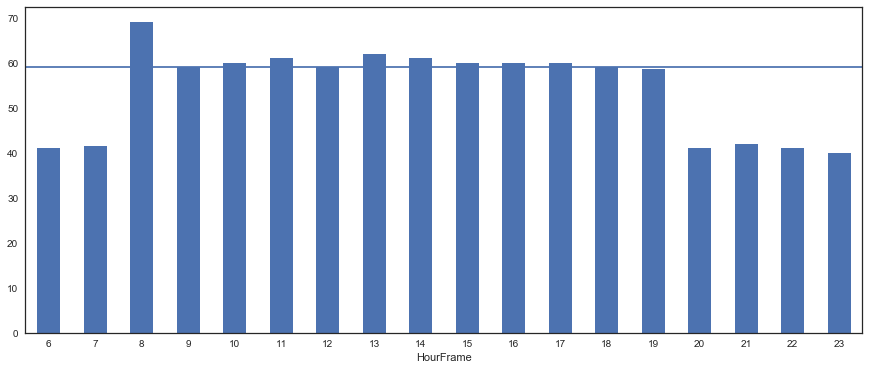

time: 176 ms


In [58]:
med_HF = trimleeson1.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

And they do.

### Decision Tree Regression, Feature analysis

Trying first without outliers removed

In [59]:
# code from here: https://gist.github.com/JustGlowing/fa2c0ac39415eb271db6

from sklearn.tree import DecisionTreeRegressor
X = LRleeson[['JPID_841001', 'JPID_841002', 'JPID_841004', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23']]
y = LRleeson['TravelTime']
rg = DecisionTreeRegressor(max_depth=10)
rg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

time: 23 ms


In [60]:
from sklearn import metrics
pred = rg.predict(X)
metrics.r2_score(y, pred)

0.1582842455475606

time: 4 ms


In [61]:
indices = np.argsort(rg.feature_importances_)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    feat = indices[f]
    print(X.columns[feat], "\t", rg.feature_importances_[indices[f]])

Feature ranking:
HF_23 	 0.205834229939
HF_22 	 0.170643996999
HF_7 	 0.151890051131
HF_6 	 0.144262819664
HF_20 	 0.0799340481947
HF_19 	 0.0606799712967
HF_21 	 0.0569828094072
HF_18 	 0.0531404401741
JPID_841004 	 0.0301654491463
HF_9 	 0.0263482896555
JPID_841002 	 0.0198202374431
JPID_841001 	 0.000297656948155
HF_11 	 0.0
HF_10 	 0.0
HF_12 	 0.0
HF_8 	 0.0
HF_14 	 0.0
HF_15 	 0.0
HF_16 	 0.0
HF_17 	 0.0
HF_13 	 0.0
time: 5 ms


Trying now with outliers removed

In [66]:
# code from here: https://gist.github.com/JustGlowing/fa2c0ac39415eb271db6

from sklearn.tree import DecisionTreeRegressor
X1 = trimleeson[['JPID_841001', 'JPID_841002', 'JPID_841004', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23']]
y1 = trimleeson['TravelTime']
rg1 = DecisionTreeRegressor(max_depth=10)
rg1.fit(X1, y1)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

time: 9 ms


In [67]:
from sklearn import metrics
pred = rg1.predict(X1)
metrics.r2_score(y1, pred)

0.21427658818989759

time: 4 ms


In [68]:
indices = np.argsort(rg1.feature_importances_)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    feat = indices[f]
    print(X1.columns[feat], "\t", rg1.feature_importances_[indices[f]])

Feature ranking:
HF_23 	 0.182191946378
HF_22 	 0.17880082531
HF_7 	 0.150824099363
HF_6 	 0.142153705733
HF_20 	 0.0958650443337
HF_21 	 0.0671377381163
HF_19 	 0.0580143979631
HF_18 	 0.0425523874722
HF_8 	 0.0304332301814
HF_13 	 0.0278542714977
JPID_841002 	 0.0199718132979
JPID_841001 	 0.00420054035378
HF_14 	 0.0
HF_12 	 0.0
HF_11 	 0.0
HF_10 	 0.0
HF_9 	 0.0
HF_15 	 0.0
HF_16 	 0.0
HF_17 	 0.0
JPID_841004 	 0.0
time: 6 ms


None of the JPID_841004 entries are in the removed outliers, yet its importance drops from 0.03 (top half of the group) to the very bottom.

In [76]:
from sklearn.ensemble import AdaBoostRegressor as ABR
abr = ABR()
abr.fit(X1, y1)
pred = abr.predict(X1)
metrics.r2_score(y1, pred)

0.11397943855548143

time: 17 ms


In [ ]:
from sklearn.ensemble import AdaBoostRegressor as ABR
abr = ABR()
abr.fit(X1, y1)
pred = abr.predict(X1)
metrics.r2_score(y1, pred)

In [78]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR()
rfr.fit(X1, y1)
pred = rfr.predict(X1)
metrics.r2_score(y1, pred)

0.23139412311572927

time: 20 ms


In [79]:
metrics.mean_squared_error(y1, pred)

241.28724337542835

time: 2 ms


In [80]:
metrics.mean_absolute_error(y1, pred)

11.373142746858981

time: 2 ms


In [81]:
metrics.median_absolute_error(y1, pred)

8.3713096997460923

time: 3 ms


In [82]:
metrics.explained_variance_score(y1, pred)

0.23140389140218798

time: 3 ms
